<a href="https://colab.research.google.com/github/JustSerhii/gestures-lab3/blob/main/mocap_tsne_autoencoder_directml2_(3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
################################################
### using filtered data

In [15]:
import pickle
with open('shaped.pickle', 'rb') as f:
    ab = pickle.load(f)

# Новий розділ

In [16]:
ab.shape

(297, 1200)

In [17]:
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
#from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition, ensemble

import numpy #,  string #pandas, xgboost, textblob,
#from tensorflow.keras.preprocessing import text, sequence
from tensorflow.keras import layers, models, optimizers

In [18]:
import tensorflow as tf
tf. __version__

'2.18.0'

In [19]:
!nvidia-smi


Sat Apr  5 14:31:31 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   43C    P8              9W /   70W |       2MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [20]:
# Перевірка, які пристрої бачить TensorFlow:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)
print("List of physical devices:", tf.config.list_physical_devices())

# Перевірка CPU (виведе модель процесора, кількість ядер тощо):
!cat /proc/cpuinfo | grep "model name" | uniq

TensorFlow version: 2.18.0
List of physical devices: [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
model name	: Intel(R) Xeon(R) CPU @ 2.30GHz


In [21]:
!cat /etc/os-release

PRETTY_NAME="Ubuntu 22.04.4 LTS"
NAME="Ubuntu"
VERSION_ID="22.04"
VERSION="22.04.4 LTS (Jammy Jellyfish)"
VERSION_CODENAME=jammy
ID=ubuntu
ID_LIKE=debian
HOME_URL="https://www.ubuntu.com/"
SUPPORT_URL="https://help.ubuntu.com/"
BUG_REPORT_URL="https://bugs.launchpad.net/ubuntu/"
PRIVACY_POLICY_URL="https://www.ubuntu.com/legal/terms-and-policies/privacy-policy"
UBUNTU_CODENAME=jammy


In [22]:
!lsb_release -a

No LSB modules are available.
Distributor ID:	Ubuntu
Description:	Ubuntu 22.04.4 LTS
Release:	22.04
Codename:	jammy


In [23]:
# Define models:

def train_model(classifier, feature_vector_train, label, feature_vector_valid, is_neural_net=False):
    # fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)

    # predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_valid)

    if is_neural_net:
        predictions = predictions.argmax(axis=-1)

    return metrics.accuracy_score(predictions, valid_y)

def train_model2(classifier, feature_vector_train, label, feature_vector_valid, valid_Y, is_neural_net=False):
    # fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)

    # predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_valid)

    if is_neural_net:
        predictions = predictions.argmax(axis=-1)

    return metrics.accuracy_score(predictions, valid_Y)

In [24]:
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
import numpy as np
from scipy.sparse import csr_matrix

from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import time
import warnings

import matplotlib.pyplot as plt

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

import scipy

In [25]:
y_ = np.ones(len(ab))

In [26]:
start_time = time.time()
#a = np.reshape(np.array(tempvar),(297*20,60))

#base parameters
default_base = {'quantile': .3,
                'eps': .3,
                'damping': .9,
                'preference': -200,
                'n_neighbors': 10, #maybe more
                'n_clusters': 4, #3 is actual number
                'min_samples': 20,
                'xi': 0.05,
                'min_cluster_size': 0.1}

params = default_base.copy()

pca = TruncatedSVD(n_components=10)
pca.fit(ab)
#csr_matrix(
transformed_ = pca.transform(ab)
end_time = time.time()
end_time-start_time

0.42211198806762695

In [27]:
#X_embedded2 = X_embedded

In [28]:
#X_embedded = transformed_

In [29]:
start_time = time.time()
#X_embedded = TSNE(n_components=2).fit_transform(transformed_)
X_embedded = transformed_
end_time = time.time()
end_time-start_time

7.796287536621094e-05

In [30]:
# ============
# Create cluster objects
# ============



two_means = cluster.MiniBatchKMeans(n_clusters=params['n_clusters'])

clustering_algorithms = (
        ('MBatchKMeans', two_means),
)

plot_num = 1

0.06036567687988281

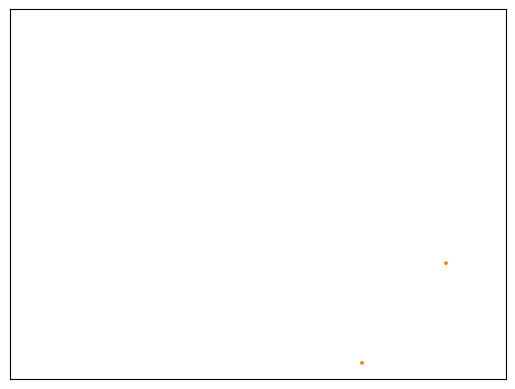

In [31]:
for name, algorithm in clustering_algorithms:

        t0 = time.time()

        # catch warnings related to kneighbors_graph
        with warnings.catch_warnings():
            warnings.filterwarnings(
                "ignore",
                message="the number of connected components of the " +
                "connectivity matrix is [0-9]{1,2}" +
                " > 1. Completing it to avoid stopping the tree early.",
                category=UserWarning)
            warnings.filterwarnings(
                "ignore",
                message="Graph is not fully connected, spectral embedding" +
                " may not work as expected.",
                category=UserWarning)
            algorithm.fit(X_embedded)



        t1 = time.time()

        if hasattr(algorithm, 'labels_'):
            y_pred = algorithm.labels_.astype(int)
        else:
            y_pred = algorithm.predict(X_embedded)

        plt.subplot(1, len(clustering_algorithms), plot_num)

        colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']),
                                      int(max(y_pred) + 1))))
        # add black color for outliers (if any)
        colors = np.append(colors, ["#000000"])


        plt.scatter(X_embedded[:, 0], X_embedded[:, 1], s=2, color=colors[y_pred])

        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())

        plot_num += 1

        # stop, plot only one image
        break

#plt.show()
t1-t0

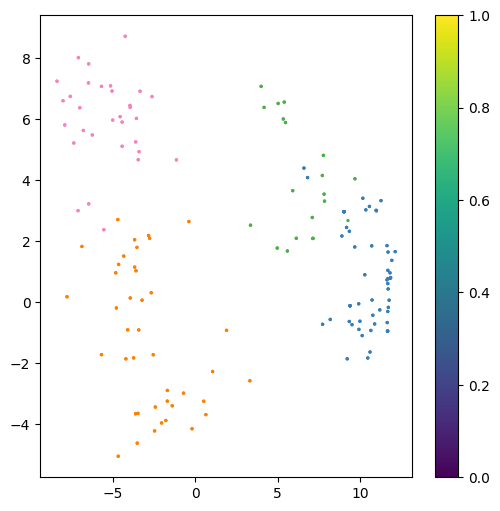

In [32]:
colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']), int(max(y_pred) + 1))))

plt.figure(figsize=(6, 6))
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], s=2, c=colors[y_pred])
plt.colorbar()
plt.show()

In [33]:
y_pred.shape

(297,)

In [34]:
#optional classifiers to choose
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
#import seaborn as sns

In [35]:
# ab (297x1200)!

In [36]:
start_time = time.time()
train_x, valid_x, train_y, valid_y = model_selection.train_test_split(X_embedded, y_pred)
end_time = time.time()
end_time-start_time

0.0038585662841796875

In [37]:
import numpy as np
#import pandas as pd
import os

import tensorflow as tf
#import tensorflow_addons as tfa #none
from tensorflow.keras import layers

import matplotlib.pyplot as plt
from IPython import display
from IPython.display import clear_output

import glob
#import imageio
import time
import IPython.display as ipd

#AUTOTUNE = tf.data.experimental.AUTOTUNE

In [38]:
# Shallow Neural Networks
# model nx100xn

import numpy as np
import scipy.sparse
import tensorflow as tf

import tensorflow.keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers

In [39]:
import tensorflow.keras as keras
from tensorflow.keras import backend as K

In [40]:
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape
from tensorflow.keras.models import Model

In [41]:
def create_dense_ae():
    # Розмірність кодованого простору
    hidden_dim = 60
    encoding_dim = 2

    # Кодувальник
    input = Input(shape=(10*1, )) # 10*1,  - розмірність вхідного шару
    # Додатковий шар для кодування вхідного представлення
    flat = Flatten()(input)

    hidden = Dense(hidden_dim, activation='relu')(flat)
    hidden2 = Dense(hidden_dim, activation='relu')(hidden)
    # Приховане подання кодувальника
    encoded = Dense(encoding_dim, activation='relu')(hidden2)

    # Декодувальник
    # Аналогічним чином, але послідовність шарів протилежна кодувальнику
    input_encoded = Input(shape=(encoding_dim,))
    hidden_encoded = Dense(hidden_dim, activation='sigmoid')(input_encoded)
    hidden_encoded2 = Dense(hidden_dim, activation='sigmoid')(hidden_encoded)

    flat_decoded = Dense(10*1, activation='sigmoid')(hidden_encoded2)
    decoded = Reshape((10*1, ))(flat_decoded)

    # Таким чином можна подати окремо модель як для кодувальника так і декодувальника
    # Або подавати шари окермо
    encoder = Model(input, encoded, name="encoder")
    decoder = Model(input_encoded, decoded, name="decoder")
    autoencoder = Model(input, decoder(encoder(input)), name="autoencoder")
    return encoder, decoder, autoencoder

In [42]:
# перелік наявних пристроїв (у випадку TF-DML)

In [43]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [44]:
with tf.device("/device:GPU:0"): # /device:DML:0 для версії 1.15
    encoder, decoder, autoencoder = create_dense_ae()
    autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=["accuracy"])

In [45]:
# якщо все гаразд, у консолі Conda має бути подібний текст:
# tensorflow/c/logging.cc:34] DirectML: creating device on adapter 0 (___ім'я вашої відеокарти___)
# tensorflow/c/logging.cc:34] Successfully opened dynamic library Kernel32.dll
# tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272]
# Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with XXXX MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)

# зазвичай обсяг пам'яті може бути вищим через віртуальну пам'ять системи, наприклад 8192 замість 4096 МB, якщо відеокарта на 4096 MB

In [46]:
# якщо немає відеокарти як такої (наприклад, якщо є процесор з ARM архітектурою без виділеного відеоядра), можливо написати і так:

In [47]:
#with tf.device("/device:CPU:0"):
#    encoder, decoder, autoencoder = create_dense_ae()
#    autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=["accuracy"])

In [48]:
autoencoder.summary()

Model: "autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 10)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ encoder (Functional)                 │ (None, 2)                   │           4,442 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ decoder (Functional)                 │ (None, 10)                  │           4,450 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,892 (34.73 KB)

 Trainable params: 8,892 (34.73 KB)

 Non-trainable params: 0 (0.00 B)

In [49]:
with tf.device("/device:GPU:0"):    # у версії TF-DML для 2.10 можна писати "/device:GPU:0" замість "/device:DML:0"
    start_time = time.time()
    autoencoder.fit(train_x, train_x,
        epochs=500,
        batch_size=50,
        shuffle=True,
        validation_data=(valid_x, valid_x))
    end_time = time.time()
    #end_time-start_time

Epoch 1/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 645ms/step - accuracy: 0.0478 - loss: 0.8618 - val_accuracy: 0.0267 - val_loss: 0.7333
Epoch 2/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.0478 - loss: 0.5907 - val_accuracy: 0.0267 - val_loss: 0.4700
Epoch 3/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.0508 - loss: 0.3444 - val_accuracy: 0.0267 - val_loss: 0.2206
Epoch 4/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.0497 - loss: 0.1041 - val_accuracy: 0.0267 - val_loss: -0.0235
Epoch 5/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.1648 - loss: -0.0992 - val_accuracy: 0.7333 - val_loss: -0.2570
Epoch 6/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6742 - loss: -0.3253 - val_accuracy: 0.6800 - val_loss: -0.4875
Epoch 7/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6897 - loss: -0.5734 - val_accuracy: 0.6800 - val_loss: -0.7090
Epoch 8/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6861 - loss: -0.7709 - val_accuracy: 0.6800 - 

In [50]:
# зауважте, що час виконання залежно від версії DirectML або типу обладнання може суттєво відрізнятися
# також час виконання на першій ітерації під відеокартою зазвичай вищий, ніж на наступних

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step


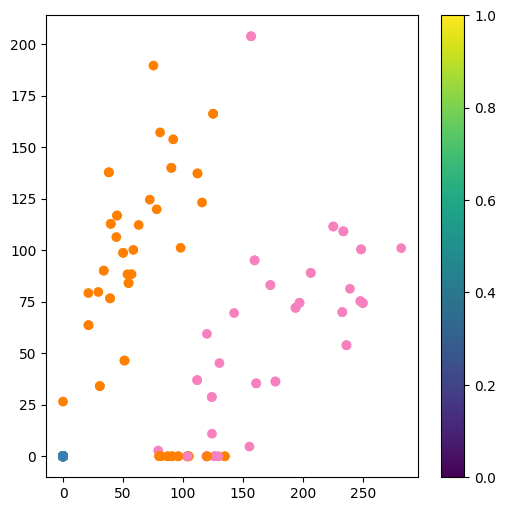

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step


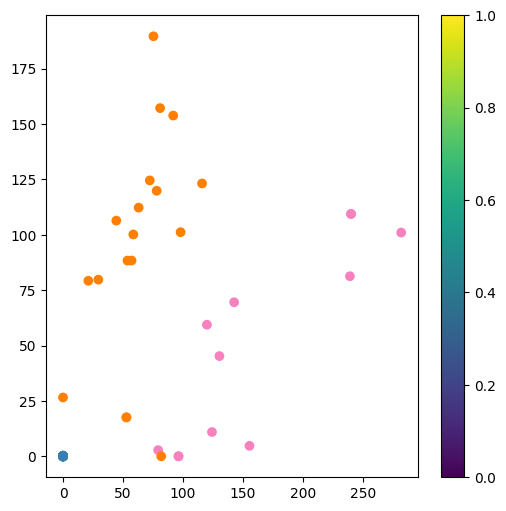

In [51]:
#Because latent space is two-dimensional, there are a few visualizations that can be done at this point.
#One is to look at the neighborhoods of different classes on the latent 2D plane:
colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']), int(max(valid_y) + 1))))

start_time = time.time()
x_train_encoded = encoder.predict(train_x, batch_size=500)
plt.figure(figsize=(6, 6))
plt.scatter(x_train_encoded[:, 0], x_train_encoded[:, 1], c = colors[train_y])
plt.colorbar()
plt.show()

x_test_encoded = encoder.predict(valid_x, batch_size=500)
plt.figure(figsize=(6, 6))
plt.scatter(x_test_encoded[:, 0], x_test_encoded[:, 1], c = colors[valid_y])
plt.colorbar()
plt.show()
end_time = time.time()

In [52]:
start_time = time.time()
train_x, valid_x, train_y, valid_y = model_selection.train_test_split(ab, y_pred)
end_time = time.time()
end_time-start_time

0.0021915435791015625

In [53]:
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
start_time = time.time()
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X_embedded, y_pred)
end_time = time.time()
end_time-start_time

0.0023305416107177734

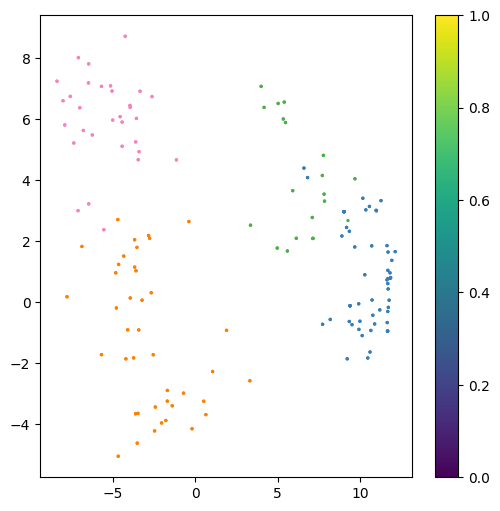

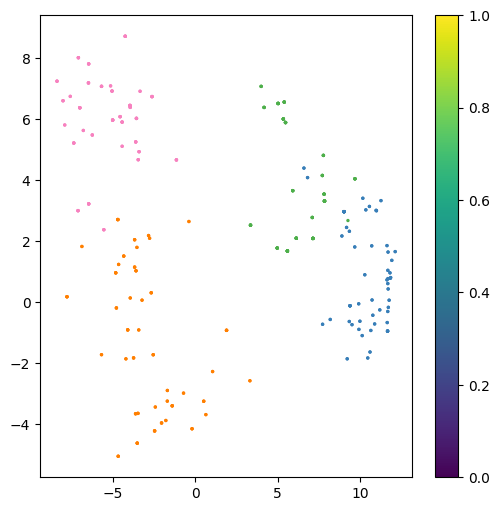

In [54]:
colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']), int(max(y_pred) + 1))))

plt.figure(figsize=(6, 6))
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], s=2, c=colors[y_pred])
plt.colorbar()
plt.show()

plt.figure(figsize=(6, 6))
plt.scatter(X_resampled[:, 0], X_resampled[:, 1], s=2, c=colors[y_resampled])
plt.colorbar()
plt.show()

In [55]:
train_x, valid_x, train_y, valid_y = model_selection.train_test_split(X_resampled, y_resampled)

In [56]:
#X_resampled, y_resampled = ros.fit_resample(X_embedded, y_pred)

In [57]:
from imblearn.over_sampling import SMOTE, ADASYN
start_time = time.time()
X_resampled2, y_resampled2 = SMOTE().fit_resample(X_embedded, y_pred)
#print(sorted(Counter(y_resampled).items()))
end_time = time.time()
end_time-start_time

0.006905317306518555

In [58]:
start_time = time.time()
clf_smote = LinearSVC().fit(X_resampled2, y_resampled2)
end_time = time.time()
end_time-start_time

0.0076656341552734375

In [59]:
start_time = time.time()
X_resampled3, y_resampled3 = ADASYN().fit_resample(X_embedded, y_pred)
#print(sorted(Counter(y_resampled).items()))
end_time = time.time()
end_time-start_time

0.010207176208496094

In [60]:
start_time = time.time()
clf_adasyn = LinearSVC().fit(X_resampled3, y_resampled3)
end_time = time.time()
end_time-start_time

0.004513740539550781

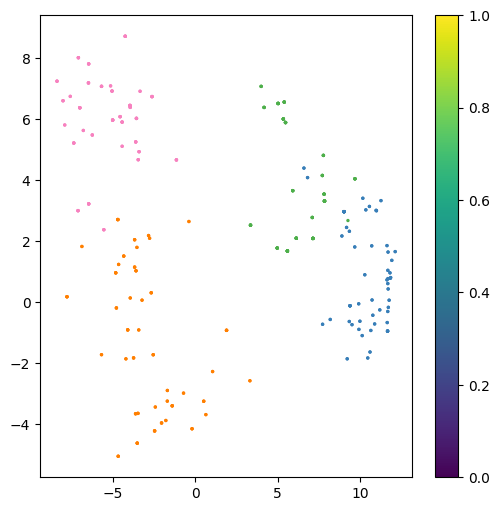

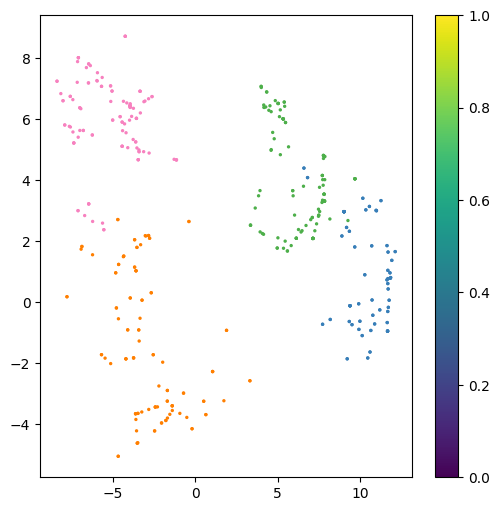

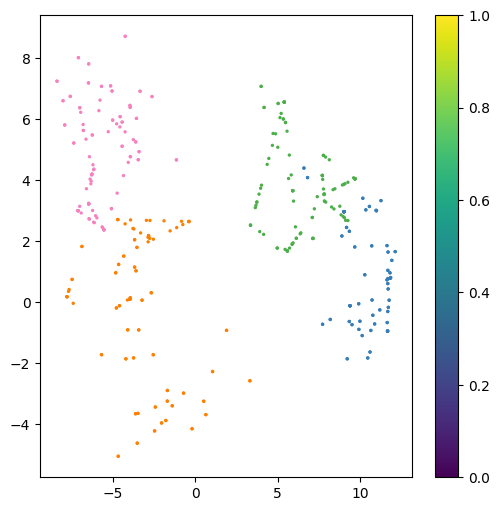

In [61]:
plt.figure(figsize=(6, 6))
plt.scatter(X_resampled[:, 0], X_resampled[:, 1], s=2, c=colors[y_resampled])
plt.colorbar()
plt.show()

plt.figure(figsize=(6, 6))
plt.scatter(X_resampled2[:, 0], X_resampled2[:, 1], s=2, c=colors[y_resampled2])
plt.colorbar()
plt.show()

plt.figure(figsize=(6, 6))
plt.scatter(X_resampled3[:, 0], X_resampled3[:, 1], s=2, c=colors[y_resampled3])
plt.colorbar()
plt.show()

In [62]:
# stops here